# P4DS Final Project: BankChurners Dataset


Nhóm 26:


Sinh viên thực hiện:


- Châu Văn Minh Khoa - 23122035


- Phan Ngọc Quân - 23122046



## I. Import thư viện

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## II. Thu thập dữ liệu




### Dữ liệu của bạn là về chủ đề gì?


- Ngành ngân hàng bán lẻ chịu áp lực lớn trong việc giữ chân khách hàng thẻ tín dụng; nếu khách đóng tài khoản thì doanh thu từ phí và lãi giảm đáng kể.


- Bộ dữ liệu BankChurners ghi nhận hồ sơ khách hàng cá nhân, thói quen sử dụng thẻ, tương tác dịch vụ và trạng thái rời bỏ (`Attrition_Flag`) để đo lường khả năng trung thành.


- Mục tiêu: xây dựng nền tảng phân tích để nhận diện sớm nguy cơ rời bỏ, từ đó đề xuất chương trình chăm sóc hoặc ưu đãi phù hợp giúp duy trì khách hàng giá trị.


- Việc mô hình hóa churn hỗ trợ nhóm kinh doanh tối ưu chi phí marketing, đồng thời cải thiện trải nghiệm khách hàng dựa trên hành vi thực tế.




### Mục đích lựa chọn dữ liệu này


- Tập dữ liệu gọn (10k dòng) nhưng đa dạng biến về nhân khẩu học, lịch sử giao dịch, mức độ tương tác; phù hợp để luyện quy trình EDA, tiền xử lý và xây dựng mô hình phân loại churn.


- Bối cảnh ngân hàng quen thuộc với các bài toán khoa học dữ liệu hướng kinh doanh, thuận tiện để trình bày insight định lượng và gợi ý chiến lược.




### Nguồn dữ liệu – Quyền sử dụng


- Nguồn: Kaggle – Credit Card Customers (tệp `BankChurners.csv`, https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers).


- License: CC0-Public Domain, được chia sẻ cho mục đích học tập và nghiên cứu.


- Mục đích sử dụng: phục vụ môn học, tuân thủ điều khoản Kaggle; dữ liệu đã được ẩn danh nhưng vẫn cần tránh suy diễn định danh cá nhân cụ thể.


- Lưu ý đạo đức: các biến tài chính nên được diễn giải có trách nhiệm, không gán nhãn tiêu cực cho nhóm khách hàng cụ thể; khi chia sẻ kết quả cần nêu rõ đây là dữ liệu giả lập/ẩn danh.




### Người ta thu thập dữ liệu như thế nào?


- Dữ liệu được tác giả tổng hợp từ website https://leaps.analyttica.com/home. Họ đã thu thập dữ liệu bằng cách sử dụng trang web này để xây dựng bộ dữ liệu và từ đó cho ra những kết quả hữu ích.



### Mô tả dữ liệu


- Mỗi dòng: Một khách hàng thẻ tín dụng với trạng thái tiếp tục hay rời bỏ, kèm các đặc trưng nhân khẩu học và hành vi sử dụng thẻ.


- Các nhóm biến chính:


  - Định lượng: `Customer_Age`, `Months_on_book`, `Credit_Limit`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Avg_Utilization_Ratio`,...


  - Phân loại: `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`.


- Mục tiêu phân tích: khám phá phân bố, xác định đặc trưng quan trọng ảnh hưởng churn, chuẩn bị cho mô hình dự báo `Attrition_Flag`.


- Thách thức: lớp churn chiếm tỷ lệ nhỏ (~16%), cần lưu ý khi xây dựng mô hình và đánh giá hiệu năng.




> Tóm lại, đây là bộ dữ liệu thực hành kinh điển cho bài toán churn trong lĩnh vực ngân hàng/thẻ tín dụng, thích hợp để minh họa pipeline EDA → tiền xử lý → mô hình phân loại và các khuyến nghị giữ chân khách hàng.

## III. Khám phá dữ liệu


### Đọc dữ liệu

In [95]:
# Đọc dữ liệu
data_path = "data/BankChurners.csv"
df = pd.read_csv(data_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Số dòng và cột

In [96]:
rows, cols = df.shape
print(f"Số dòng: {rows}, Số cột: {cols}")

Số dòng: 10127, Số cột: 23


- Như vậy data có số dòng là 10.127 và số cột là 23.

### Các dòng dữ liệu

#### Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa khác với các dòng còn lại không?

In [97]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
9752,780511683,Attrited Customer,47,M,3,Graduate,Single,$40K - $60K,Blue,34,...,4413.0,232,4181.0,0.799,7869,76,0.767,0.053,0.996830,0.003175
6892,771918033,Existing Customer,54,M,4,Graduate,Single,$80K - $120K,Blue,43,...,8208.0,1256,6952.0,0.814,4824,83,0.627,0.153,0.000383,0.999620
2872,720688158,Existing Customer,37,F,3,High School,Single,Less than $40K,Blue,25,...,2282.0,0,2282.0,0.741,2751,68,0.659,0.000,0.000329,0.999670
1263,720836808,Existing Customer,35,M,3,High School,Single,$80K - $120K,Blue,28,...,11521.0,1147,10374.0,1.023,2260,68,1.125,0.100,0.000115,0.999890
7729,715515333,Existing Customer,51,M,3,Graduate,Married,$120K +,Blue,42,...,7932.0,2140,5792.0,0.554,4024,92,0.614,0.270,0.000096,0.999900
7296,828294933,Attrited Customer,49,F,3,High School,Married,Less than $40K,Blue,45,...,2951.0,2437,514.0,0.765,2519,36,0.565,0.826,0.994850,0.005150
9417,827901183,Existing Customer,51,F,2,Graduate,Married,Less than $40K,Blue,47,...,5118.0,980,4138.0,0.786,14593,109,0.627,0.191,0.000069,0.999930
9654,712390683,Existing Customer,41,M,2,Uneducated,Single,$40K - $60K,Blue,27,...,13409.0,1255,12154.0,0.742,15573,99,0.768,0.094,0.000112,0.999890
6786,719350908,Existing Customer,43,M,4,Unknown,Unknown,Less than $40K,Blue,35,...,4177.0,2094,2083.0,0.466,3553,66,0.650,0.501,0.000207,0.999790
2728,721083258,Existing Customer,37,F,4,High School,Divorced,$40K - $60K,Blue,22,...,2563.0,1638,925.0,0.681,2064,46,0.917,0.639,0.000094,0.999910


- Mỗi dòng tương ứng một khách hàng thẻ tín dụng, có vẻ không có dòng nào khác biệt bất thường.

#### Kiểm tra trùng lặp

In [98]:
# Kiểm tra trùng lặp hoàn toàn
duplicate_count = df.duplicated().sum()
print(f"Số dòng trùng lặp hoàn toàn: {duplicate_count}")
df[df.duplicated()]

Số dòng trùng lặp hoàn toàn: 0


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


- Không có dòng nào bị trùng hoàn toàn cả.

### Các cột dữ liệu

#### Ý nghĩa các cột

In [99]:
list(df.columns.values)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

| Cột | Ý nghĩa |
|---|---|
| CLIENTNUM | Định danh nội bộ của khách hàng trong hệ thống thẻ tín dụng. |
| Attrition_Flag | Trạng thái khách hàng: `Attrited Customer` (đã đóng) hoặc `Existing Customer` (còn hoạt động). |
| Customer_Age | Tuổi của khách hàng. |
| Gender | Giới tính (`M`/`F`). |
| Dependent_count | Số người phụ thuộc trong hộ gia đình. |
| Education_Level | Trình độ học vấn (High School, Graduate, Doctorate, Unknown,...). |
| Marital_Status | Tình trạng hôn nhân (Married, Single, Divorced,...). |
| Income_Category | Nhóm thu nhập hằng năm (ví dụ: `< $40K`, `$60K - $80K`). |
| Card_Category | Hạng thẻ tín dụng (Blue, Silver, Gold, Platinum). |
| Months_on_book | Số tháng khách hàng đã gắn bó với ngân hàng (tuổi thẻ). |
| Total_Relationship_Count | Tổng số sản phẩm tài chính khách hàng sở hữu. |
| Months_Inactive_12_mon | Số tháng không hoạt động trong 12 tháng gần nhất. |
| Contacts_Count_12_mon | Số lần nhân viên liên hệ khách trong 12 tháng gần nhất. |
| Credit_Limit | Hạn mức tín dụng hiện tại. |
| Total_Revolving_Bal | Số dư quay vòng (revolving balance) trên thẻ. |
| Avg_Open_To_Buy | Hạn mức còn lại trung bình (Credit_Limit - Total_Revolving_Bal). |
| Total_Amt_Chng_Q4_Q1 | Mức thay đổi tổng giá trị giao dịch giữa quý 4 và quý 1. |
| Total_Trans_Amt | Tổng giá trị giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Trans_Ct | Tổng số lượng giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Ct_Chng_Q4_Q1 | Mức thay đổi số lượng giao dịch giữa quý 4 và quý 1. |
| Avg_Utilization_Ratio | Tỷ lệ sử dụng tín dụng trung bình (Total_Revolving_Bal / Credit_Limit). |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_1 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 1) hỗ trợ phân loại churn. |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_2 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 2) bổ sung cho biến trên. |

#### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [100]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [101]:
# Chuẩn hóa giới tính về nhị phân 0/1 (chỉnh trực tiếp cột Gender)
# M -> 1, F -> 0
if 'Gender' in df.columns:
    df['Gender'] = (
        df['Gender']
        .astype(str)
        .str.strip()
        .str.upper()
        .map({'M': 1, 'F': 0})
    )
    print('Đã chuẩn hóa trực tiếp cột Gender (M=1, F=0).')
else:
    print('Không tìm thấy cột Gender trong DataFrame.')

Đã chuẩn hóa trực tiếp cột Gender (M=1, F=0).


In [102]:
# Chuẩn hóa nhãn Attrition_Flag về nhị phân 0/1
if 'Attrition_Flag' in df.columns:
    df['Attrition_Flag'] = (
        df['Attrition_Flag']
        .astype(str)
        .str.strip()
        .map({'Attrited Customer': 1, 'Existing Customer': 0})
    )
    if df['Attrition_Flag'].notna().all():
        df['Attrition_Flag'] = df['Attrition_Flag'].astype('int64')
    print('Đã chuẩn hóa Attrition_Flag (Attrited=1, Existing=0).')
else:
    print('Không tìm thấy cột Attrition_Flag trong DataFrame.')

Đã chuẩn hóa Attrition_Flag (Attrited=1, Existing=0).


#### Xóa cột định danh khách hàng và 2 feature cuối

In [103]:
if 'CLIENTNUM' in df.columns:
    df = df.drop(columns=['CLIENTNUM'])
    print("Đã xóa cột CLIENTNUM.")
# xóa 2 cột cuối cùng không phải dữ liệu thực tế
df = df.drop(columns=df.columns[-2:])


Đã xóa cột CLIENTNUM.


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- Như vậy các cột dữ liệu đã ổn để tiếp tục.

#### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào

Vì trong các cột có kiểu dữ liệu dạng số, có vài cột có ít hơn 5 giá trị khác nhau nên ta sẽ xét chúng vào nhóm kiểu dữ liệu dạng phân loại

In [105]:
unique_counts = df.nunique() < 5
categorical  = unique_counts[unique_counts == True].index.tolist()
# Thêm các cột không phải dạng số
cat2 = df.select_dtypes(exclude=["number", "bool_"]).columns.tolist()
# Gộp và loại bỏ trùng
categorical = list(dict.fromkeys(categorical + cat2))
categorical

['Attrition_Flag',
 'Gender',
 'Marital_Status',
 'Card_Category',
 'Education_Level',
 'Income_Category']

Numeric: các cột còn lại không thuộc categorical và có kiểu số

In [106]:
numeric = [col for col in df.columns if col not in categorical and pd.api.types.is_numeric_dtype(df[col])]
numeric

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:
- Số các giá trị thiếu
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị median
- Giá trị max

In [107]:
num_summary_rows = []
for col in numeric:
    s = df[col]
    missing = s.isna().sum()
    missing_pct = round(missing/len(s)*100,2)
    mean_val = s.mean()
    min_val = s.min()
    q1 = s.quantile(0.25)
    median_val = s.median()
    q3 = s.quantile(0.75)
    max_val = s.max()
    num_summary_rows.append({
        'column': col,
        'num_missing': missing,
        'missing_%': missing_pct,
        'mean': mean_val,
        'min': min_val,
        'q1': q1,
        'median': median_val,
        'q3': q3,
        'max': max_val
    })
num_summary_df = pd.DataFrame(num_summary_rows)
print('\n=== Thống kê numeric ===')
num_summary_df


=== Thống kê numeric ===


,column,num_missing,missing_%,mean,min,q1,median,q3,max
0,Customer_Age,0,0.0,46.325960,26.0,41.000,46.000,52.000,73.000
1,Dependent_count,0,0.0,2.346203,0.0,1.000,2.000,3.000,5.000
2,Months_on_book,0,0.0,35.928409,13.0,31.000,36.000,40.000,56.000
3,Total_Relationship_Count,0,0.0,3.812580,1.0,3.000,4.000,5.000,6.000
4,Months_Inactive_12_mon,0,0.0,2.341167,0.0,2.000,2.000,3.000,6.000
5,Contacts_Count_12_mon,0,0.0,2.455317,0.0,2.000,2.000,3.000,6.000
6,Credit_Limit,0,0.0,8631.953698,1438.3,2555.000,4549.000,11067.500,34516.000
7,Total_Revolving_Bal,0,0.0,1162.814061,0.0,359.000,1276.000,1784.000,2517.000
8,Avg_Open_To_Buy,0,0.0,7469.139637,3.0,1324.500,3474.000,9859.000,34516.000
9,Total_Amt_Chng_Q4_Q1,0,0.0,0.759941,0.0,0.631,0.736,0.859,3.397


#### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu không phải số và các cột có dạng số nhưng có ít hơn 5 giá trị khác nhau, ta sẽ tính:

- Số các giá trị thiếu và tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu) 
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

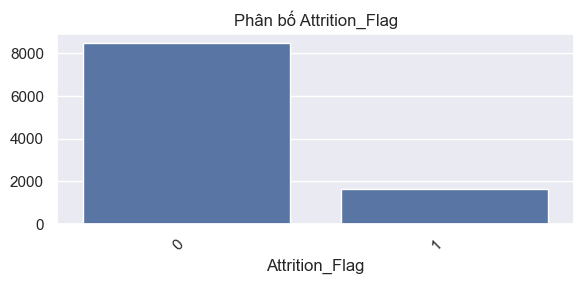

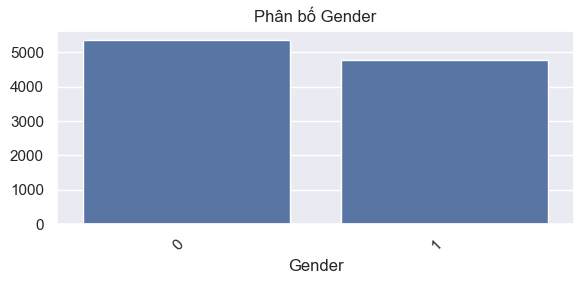

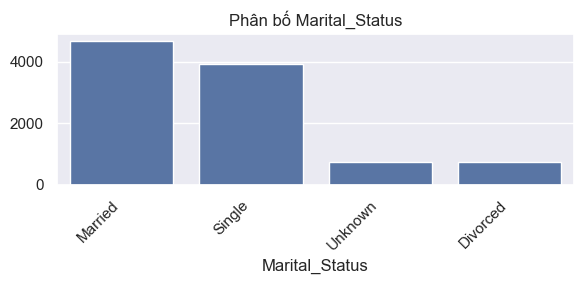

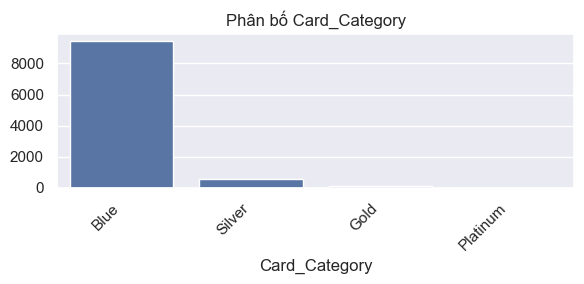

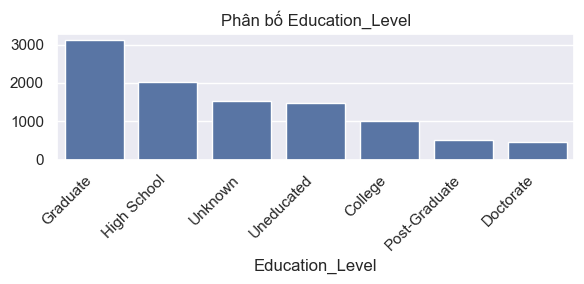

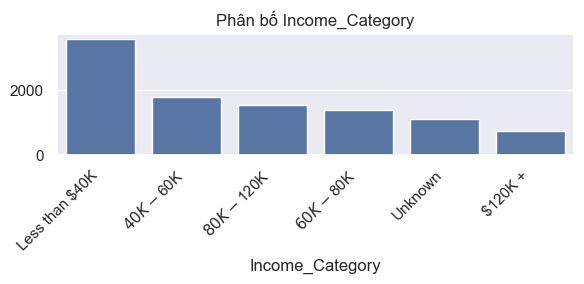

In [108]:
# Thống kê nhóm biến categorical
cat_summary_rows = []
for col in categorical:
    s = df[col]
    missing = s.isna().sum()
    missing_pct = round(missing/len(s)*100,2)
    unique_vals = s.nunique(dropna=True)
 
    value_pct = (s.value_counts(normalize=True, dropna=True)*100).round(2).to_dict()
    cat_summary_rows.append({
        'column': col,
        'num_missing': missing,
        'missing_%': missing_pct,
        'unique_values': unique_vals,
        'value_percentages': value_pct
    })
cat_summary_df = pd.DataFrame(cat_summary_rows)
cat_summary_df

# === Trực quan nhanh một số biến categorical (giới hạn số giá trị <= 15) ===
import matplotlib.pyplot as plt
import seaborn as sns
for col in categorical:
    vc = df[col].value_counts(dropna=False)
    if vc.shape[0] <= 15:
        plt.figure(figsize=(6,3))
        sns.barplot(x=vc.index.astype(str), y=vc.values)
        plt.title(f'Phân bố {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

Nhìn nhanh vào các biến phân loại cho thấy khách hàng còn sử dụng thẻ (Existing) chiếm đa số (~84%), hạng thẻ Blue áp đảo, trong khi các hạng cao hơn và trạng thái churn khá ít nên cần cân nhắc kỹ khi trực quan hoặc xây dựng mô hình.

### Phát hiện outlier (IQR)

In [109]:
# IQR outlier detection
outlier_rows = []
for col in numeric:
    s = df[col].dropna()
    if s.nunique() < 5:
        continue
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    outlier_rows.append({"column": col, "outliers": mask.sum(), "percent": round(mask.sum()/len(s)*100,2)})
import pandas as pd
pd.DataFrame(outlier_rows)

,column,outliers,percent
0,Customer_Age,2,0.02
1,Dependent_count,0,0.00
2,Months_on_book,386,3.81
3,Total_Relationship_Count,0,0.00
4,Months_Inactive_12_mon,331,3.27
5,Contacts_Count_12_mon,629,6.21
6,Credit_Limit,984,9.72
7,Total_Revolving_Bal,0,0.00
8,Avg_Open_To_Buy,963,9.51
9,Total_Amt_Chng_Q4_Q1,396,3.91


### Sơ lược mối tương quan giữa các cột

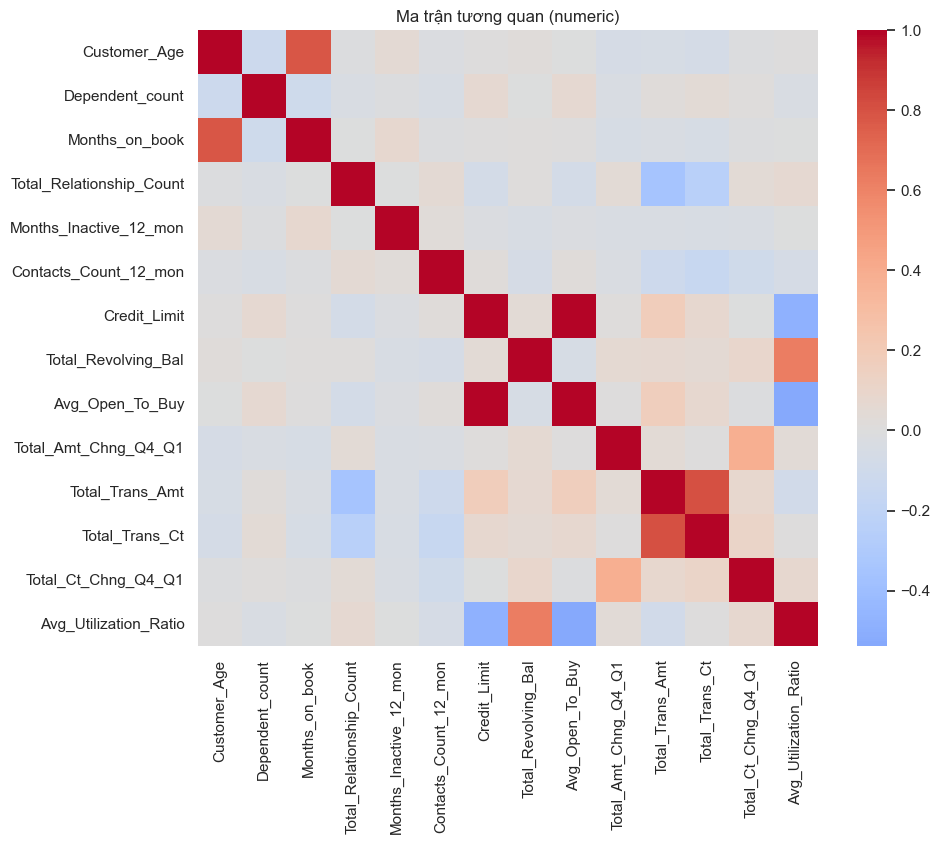

In [110]:
# Heatmap tương quan
corr = df[numeric].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Ma trận tương quan (numeric)")
plt.show()

## IV. Đặt câu hỏi và thực hiện phân tích dữ liệu
(Sẽ bổ sung sau: câu hỏi nghiên cứu, phân tích sâu, trực quan nâng cao.)

## V. Tổng kết


(Hiện tại: Đã khám phá cấu trúc, phân bố, outlier, tương quan cho bài toán churn. Hướng phát triển: xử lý mất cân bằng lớp, thử mô hình ML, phân tích tầm ảnh hưởng của các biến hành vi giao dịch.)

## VI. Tài liệu tham khảo
1. Kaggle Credit Card Customers (BankChurners) dataset.
2. IBM Sample Data – Predict Customer Churn (tài liệu mô tả biến).
3. Phương pháp thống kê mô tả, phát hiện outlier (IQR) và tiền xử lý churn.